## 한글 워드클라우드

In [1]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 21 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,096 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [1]:
# import
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# 한글 폰트 불러오기
plt.rc('font', family='NanumBarunGothic')

In [3]:
# konlpy 설치
!pip install konlpy > /dev/null

In [4]:
text = '열심히 코딩한 당신, 연휴에는 여행을 떠나 보세요.'

In [5]:
# 한글 형태소 분석기
from konlpy.tag import Okt, Kkma, Komoran
okt = Okt()
kkma = Kkma()
kr = Komoran()

In [6]:
print(okt.morphs(text))
print(kkma.morphs(text))
print(kr.morphs(text))

['열심히', '코딩', '한', '당신', ',', '연휴', '에는', '여행', '을', '떠나', '보세요', '.']
['열심히', '코딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '떨', '나', '보', '세요', '.']
['열심히', '코', '딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '떠나', '아', '보', '시', '어요', '.']


In [7]:
# 품사 태깅(part-od speech tagging)
print(okt.pos(text))
print(kkma.pos(text))
print(kr.pos(text))

[('열심히', 'Adverb'), ('코딩', 'Noun'), ('한', 'Josa'), ('당신', 'Noun'), (',', 'Punctuation'), ('연휴', 'Noun'), ('에는', 'Josa'), ('여행', 'Noun'), ('을', 'Josa'), ('떠나', 'Verb'), ('보세요', 'Verb'), ('.', 'Punctuation')]
[('열심히', 'MAG'), ('코딩', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('당신', 'NP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKM'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('떨', 'VV'), ('나', 'ECE'), ('보', 'VXV'), ('세요', 'EFN'), ('.', 'SF')]
[('열심히', 'MAG'), ('코', 'NNG'), ('딩', 'MAG'), ('하', 'XSV'), ('ㄴ', 'ETM'), ('당신', 'NNP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKB'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('떠나', 'VV'), ('아', 'EC'), ('보', 'VV'), ('시', 'EP'), ('어요', 'EF'), ('.', 'SF')]


* 명사만 추출

In [8]:
print(okt.nouns(text))
print(kkma.nouns(text))
print(kr.nouns(text))

['코딩', '당신', '연휴', '여행']
['코딩', '당신', '연휴', '여행']
['코', '당신', '연휴', '여행']


## 워드클라우드
* 한빛출판네트워크 > 새로나온책 200권 > tag
* tag를 워드틀라우드로 만들기

In [10]:
# 셀레니움 설치
!apt-get update > /dev/null 2>&1
!pip install selenium > /dev/null 2>&1
!apt install chromium-chromedriver > /dev/null 2>&1

In [43]:
# import
from bs4 import BeautifulSoup
import pandas as pd
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import math
import folium
import requests
from urllib.parse import quote
import json
from tqdm.notebook import tqdm

In [14]:
url = 'https://www.hanbit.co.kr/store/books/new_book_list.html'
req = requests.get(url)
soup = BeautifulSoup(req.text, 'html.parser')
soup

<!DOCTYPE html>

<html lang="ko">
<head>
<!--[if lte IE 8]>
<script>
  location.replace('/support/explorer_upgrade.html');
</script>
<![endif]-->
<meta charset="utf-8"/>
<title>한빛출판네트워크</title>
<link href="https://www.hanbit.co.kr/images/common/hanbit.ico" rel="shortcut icon"/>
<meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
<meta content="website" property="og:type"/>
<meta content="한빛출판네트워크" property="og:title"/>
<meta content="더 넓은 세상, 더 나은 미래를 위한 아시아 출판 네트워크 :: 한빛미디어, 한빛아카데미, 한빛비즈, 한빛라이프, 한빛에듀" property="og:description"/>
<meta content="https://www.hanbit.co.kr/images/hanbitpubnet_logo.jpg" property="og:image"/>
<meta content="https://www.hanbit.co.kr/store/books/new_book_list.html" property="og:url"/>
<link href="https://www.hanbit.co.kr/store/books/new_book_list.html" rel="canonical">
<meta content="한빛미디어,한빛아카데미,한빛비즈,한빛라이프,한빛에듀,리얼타임,대관서비스,책,출판사,IT전문서,IT활용서,대학교재,경제경영,어린이/유아,실용/여행,전자책,자격증,교육,세미나,강의,ebook,정보교과서" name="keywords"/>
<meta content="더 넓은 세상, 더 나은 미래를 위한 아시아 출판 네트워

In [16]:
title = soup.select('.book_tit')
title

[<p class="book_tit"><a href="/store/books/look.php?p_code=B4422381134">1학년 시계 달력</a></p>,
 <p class="book_tit"><a href="/store/books/look.php?p_code=B1068448075">실전에서 바로 쓰는 Next.js</a></p>,
 <p class="book_tit"><a href="/store/books/look.php?p_code=B9480318629">(NO.1 영상 편집 유튜버) 비됴클래스의 유튜브 영상 편집 with 프리미어 프로</a></p>,
 <p class="book_tit"><a href="/store/books/look.php?p_code=B7099909363">IT CookBook, Android Studio를 활용한 안드로이드 프로그래밍(8판)</a></p>,
 <p class="book_tit"><a href="/store/books/look.php?p_code=B5620881464">STEM CookBook, 전기 및 하이브리드 자동차(3판)</a></p>,
 <p class="book_tit"><a href="/store/books/look.php?p_code=B1398618081">신비한 뮤직박스 2 : 시프리앙의 비밀</a></p>,
 <p class="book_tit"><a href="/store/books/look.php?p_code=B1147715738">업무에 바로 쓰는 AWS 입문</a></p>,
 <p class="book_tit"><a href="/store/books/look.php?p_code=B3384919392">AI 2041</a></p>,
 <p class="book_tit"><a href="/store/books/look.php?p_code=B4508124592">나도 손글씨 반듯하게 잘 쓰면 소원이 없겠네</a></p>,
 <p class="book_tit"><a href="/store/boo

In [20]:
for t in title:
    href = t.find('a')['href']
    print(href)

/store/books/look.php?p_code=B4422381134
/store/books/look.php?p_code=B1068448075
/store/books/look.php?p_code=B9480318629
/store/books/look.php?p_code=B7099909363
/store/books/look.php?p_code=B5620881464
/store/books/look.php?p_code=B1398618081
/store/books/look.php?p_code=B1147715738
/store/books/look.php?p_code=B3384919392
/store/books/look.php?p_code=B4508124592
/store/books/look.php?p_code=B3821180873
/store/books/look.php?p_code=B4435817798
/store/books/look.php?p_code=B8870109394
/store/books/look.php?p_code=B4182532903
/store/books/look.php?p_code=B9458048985
/store/books/look.php?p_code=B9711663545
/store/books/look.php?p_code=B1459262097
/store/books/look.php?p_code=B1666992199
/store/books/look.php?p_code=B3672807578
/store/books/look.php?p_code=B4416755821
/store/books/look.php?p_code=B8753305821


In [21]:
base_url = 'https://www.hanbit.co.kr'

In [22]:
sub_req = requests.get(base_url + href)
sub_soup = BeautifulSoup(sub_req.text, 'html.parser')
sub_soup

<!DOCTYPE html>

<html lang="ko">
<head>
<!--[if lte IE 8]>
<script>
  location.replace('/support/explorer_upgrade.html');
</script>
<![endif]-->
<meta charset="utf-8"/>
<title>IT CookBook, 생활 속 예제로 배우는 생생 데이터 분석</title>
<link href="https://www.hanbit.co.kr/images/common/hanbit.ico" rel="shortcut icon"/>
<meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
<meta content="website" property="og:type"/>
<meta content="IT CookBook, 생활 속 예제로 배우는 생생 데이터 분석" property="og:title"/>
<meta content="어려운 통계 수학 공식이나 복잡한 분석 모형 없이 데이터 전처리와 데이터 시각화를 중점적으로 다룹니다." property="og:description"/>
<meta content="https://www.hanbit.co.kr/data/books/B8753305821_m.jpg" property="og:image"/>
<meta content="https://www.hanbit.co.kr/store/books/look.php?p_code=B8753305821" property="og:url"/>
<link href="https://www.hanbit.co.kr/store/books/look.php?p_code=B8753305821" rel="canonical">
<meta content="데이터 분석,데이터 과학,파이썬,인공지능,빅데이터" name="keywords"/>
<meta content="어려운 통계 수학 공식이나 복잡한 분석 모형 없이 데이터 전처리와 데이터 시각화를 중점적으로 다

In [26]:
sub_soup.select('.tag_area > a')

[<a href="/search/search_list.html?ptype=B&amp;keyword=데이터 분석">데이터 분석</a>,
 <a href="/search/search_list.html?ptype=B&amp;keyword=데이터 과학">데이터 과학</a>,
 <a href="/search/search_list.html?ptype=B&amp;keyword=파이썬">파이썬</a>,
 <a href="/search/search_list.html?ptype=B&amp;keyword=인공지능">인공지능</a>,
 <a href="/search/search_list.html?ptype=B&amp;keyword=빅데이터">빅데이터</a>]

In [27]:
tag = []
for t in sub_soup.select('.tag_area > a'):
    tag.append(t.text)
tag

['데이터 분석', '데이터 과학', '파이썬', '인공지능', '빅데이터']

In [31]:
sub_soup.select_one('.store_product_info_box > h3').text

'IT CookBook, 생활 속 예제로 배우는 생생 데이터 분석'

In [32]:
title = sub_soup.select_one('.store_product_info_box > h3').text

In [35]:
for t in title:
    href = t.find('a')['href']
    print(href)
    sub_req = requests.get(base_url + h)
    sub_soup = BeautifulSoup(sub_req.text, 'html.parser')

    title = sub_soup.select_one('.store_product_info_box > h3').text
    tag = []
    for t in sub_soup.select('.tag_area > a'):
        tag.append(t.text)

    book = []
    book.append(title)
    book.append(tag)
book

TypeError: ignored

In [36]:
base_url = 'https://www.hanbit.co.kr'
sub_url = '/store/books/new_book_list.html'
url = base_url + sub_url
res = requests.get(url)
soup = BeautifulSoup(res.text, 'html.parser')

In [37]:
lis = soup.select('.sub_book_list')

In [38]:
li = lis[0]
href = li.find('a')['href']

In [39]:
res = requests.get(base_url + href)
book_soup = BeautifulSoup(res.text, 'html.parser')

In [40]:
tags = book_soup.select('.tag_area > a')

In [41]:
tag_list = []
for a in tags:
    tag_list.append(a.get_text().strip())

In [45]:
tag_list = []
for page in tqdm(range(1,11)):
    url = f'{base_url}{sub_url}?page={page}'
    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'html.parser')
    lis = soup.select('.sub_book_list')

    for li in lis:
        book_url = li.find('a')['href']
        res = requests.get(base_url + book_url)
        book_soup = BeautifulSoup(res.text, 'html.parser')
        tags = book_soup.select('.tag_area > a')

        for a in tags:
            tag_list.append(a.get_text().strip())

  0%|          | 0/10 [00:00<?, ?it/s]

In [47]:
tag_list[100:150]

['CI/CD 파이프라인',
 '인공지능',
 '4차 산업혁명',
 '미래',
 '트렌드',
 '기술',
 '리카이푸',
 '천치우판',
 '악필교정',
 '손글씨',
 '펜글씨',
 '글씨교정',
 '바른글씨',
 '예쁜글씨',
 '캘리그라피',
 '유튜브',
 '유튜버',
 '크리에이터',
 '강차분PD',
 '나는유튜버다',
 '유튜브 채널 기획',
 '유튜브 채널 운영',
 '채널운영전략',
 '알고리즘인플루언서',
 '부업',
 '돈벌기',
 '프로덕트매니저',
 'PM',
 '프로젝트',
 '리더',
 'project',
 '제품',
 'product',
 '구현',
 '운영',
 '자기계발',
 '기획서',
 '요구사항 정의서',
 '화면 설계서',
 '테스트',
 '배포',
 '시나리오',
 '리더',
 '컴퓨터 비전',
 '딥러닝',
 '파이썬',
 'OpenCV',
 '텐서플로',
 '유령',
 '탐정']

In [48]:
len(tag_list)

2155

## 워드클라우드 만들기
* tag_list를 frequency dictionary로 만들기기

In [49]:
tag_set = set(tag_list)
len(tag_set)

1542

In [50]:
tag_dict = {}
for item in tag_set:
    tag_dict[item] = tag_list.count(item)

In [ ]:
# tag_dict = {item:tag_list.count(item) for item in tag_set}

In [51]:
tag_dict

{'': 1,
 '백엔드': 2,
 '볼록 최적화': 1,
 '가설검정': 2,
 'SSR': 1,
 '건축 도면': 1,
 '올림포스': 1,
 '우생학': 1,
 '산업화': 1,
 '통계적 비효율성': 1,
 '주홍글자': 1,
 'Developer Relations': 1,
 '글씨교정': 1,
 '공부태도': 1,
 '시공간 초월': 2,
 'Excel': 2,
 '계획표': 1,
 '파이썬 입문': 1,
 '시스템 설계': 1,
 'Cypress': 1,
 '전력공학': 1,
 '한글이야호': 5,
 'partition': 1,
 '읽기독립': 5,
 '객체 지향 프로그래밍': 3,
 '수입': 1,
 '도서관': 1,
 '나라': 1,
 '싱가포르': 1,
 '머신러닝': 15,
 '팬더스': 1,
 '미로찾기': 1,
 '조직문화': 1,
 '어도비 애프터 이펙트': 1,
 '주식 투자': 1,
 '비용 최적화': 1,
 '마이크로서비스': 3,
 '소프트웨어 설계': 3,
 'TypeScript': 2,
 '에픽 미키': 1,
 '관찰력': 4,
 '유지관리': 1,
 '웹 프로그래밍': 1,
 '가족': 3,
 '가산적 프로그래밍': 1,
 '풀퍼널마케팅': 1,
 '엑셀2010': 2,
 '호주여행': 1,
 '애프터 이펙트 3D': 1,
 'CI/CD 파이프라인': 1,
 '의학': 1,
 '3D 영상 디자인': 1,
 '소켓프로그래밍': 1,
 '커뮤니티 빌더': 1,
 '운송': 1,
 '프로크리에이트': 1,
 '공동체': 1,
 '인플레이션': 1,
 '애프터 이펙트 CC 2022': 1,
 'design pattern': 1,
 '매크로': 2,
 'RNN': 3,
 'HEV': 1,
 '데이터분석': 4,
 '결과 타입': 1,
 '샬럿브론테': 1,
 '수채화': 1,
 '전략기획': 2,
 'React Native': 1,
 '양육': 1,
 '캠핑카여행': 1,
 'Head first': 1,
 '문장력': 1,
 '시간'

In [52]:
count = 0
for key, val in tag_dict.items():
    print(key, ':', val)
    count += 1
    if count > 5:
        break

 : 1
백엔드 : 2
볼록 최적화 : 1
가설검정 : 2
SSR : 1
건축 도면 : 1


## 워드클라우드 만들기기

In [53]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
from wordcloud import WordCloud

In [60]:
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

In [62]:
wc = WordCloud(background_color='white', random_state=2023, font_path=font_path)
wc = wc.generate_from_frequencies(tag_dict)

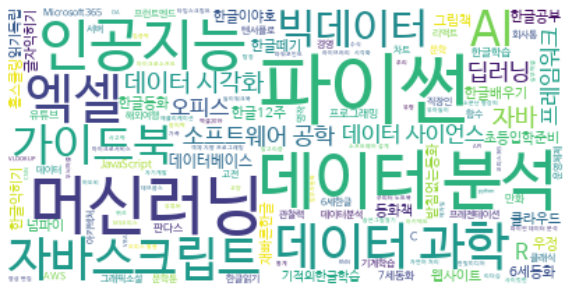

In [63]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

* 단어를 펼쳐서 워드클라우드 만들어보기

In [64]:
tag_text = ' '.join(tag_list)

In [68]:
wc = WordCloud(background_color='white', random_state=2023, font_path=font_path,
               max_words=500)
wc = wc.generate(tag_text)

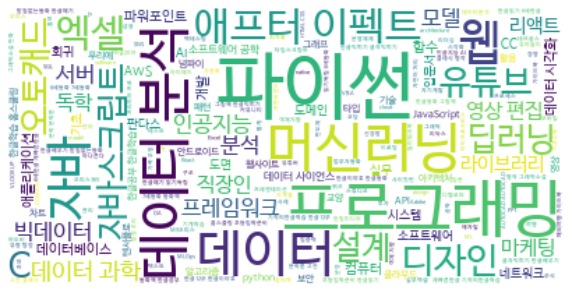

In [69]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()